In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import image

In [58]:
def dwt(x, levels = 1):

    # x must be length 2^n
    n = len(x)
    out = np.zeros(n)
    
    # low pass
    h = [1 / math.sqrt(2), 1 / math.sqrt(2)]
    out[:n//2] = h[0] * x[::2] + h[1] * x[1::2]
    
    # high pass
    g = [h[1], -h[0]]
    out[n//2:] = g[0] * x[::2] + g[1] * x[1::2]
    
    if levels > 1:
        out[:n//2] = dwt(out[:n//2], levels - 1)
    return out

In [55]:
def idwt(waves, levels = 1):
    n = len(waves)
    out = np.zeros(n)
    
    if levels > 1:
        waves[:n//2] = idwt(waves[:n//2], levels - 1)
    interleaved = np.ravel(np.column_stack((waves[:n//2],waves[n//2:])))
    
    h_inv = [1 / math.sqrt(2), 1 / math.sqrt(2)]
    g_inv = [h_inv[1], -h_inv[0]]
        
    # low pass
    out[::2] = h_inv[0] * interleaved[::2] + h_inv[1] * interleaved[1::2]
    
    # high pass
    out[1::2] = g_inv[0] * interleaved[::2] + g_inv[1] * interleaved[1::2]
    
    return out

In [43]:
def dwt2d(img, levels):
    h, w = img.shape
    out = np.zeros(img.shape)
    rows = np.zeros(img.shape)
    
    for y in range(h):
        rows[y, :] = dwt(img[y, :])
    
    for x in range(w):
        out[:, x] = dwt(rows[:, x])
    
    if levels > 1:
        out[:h//2, :w//2] = dwt2d(out[:h//2, :w//2], levels - 1)
    
    return out

In [63]:
def idwt2d(waves, levels):
    h, w = waves.shape
    out = np.zeros(waves.shape)
    rows = np.zeros(waves.shape)
    
    if levels > 1:
        waves[:h//2, :w//2] = idwt2d(waves[:h//2, :w//2], levels - 1)
    
    for x in range(w):
        rows[:, x] = idwt(waves[:, x])
    
    for y in range(h):
        out[y, :] = idwt(rows[y, :])
    
    return out

In [83]:
def psnr(img1, img2):
    return 20 * np.log(255**2 / norm(img1 - img2, 2))

1.0 1.4762190481391881


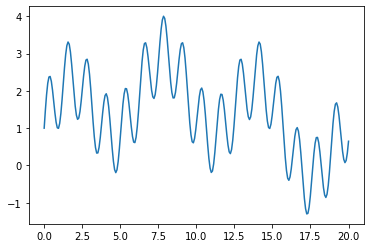

In [35]:
x = np.linspace(0, 20, 256)
y = np.sin(0.2 * x) + np.sin(x) + np.sin(5 * x) + 1
plt.plot(x, y)
print(y[0], y[1])

5.517108851511537 -0.3367377182694229


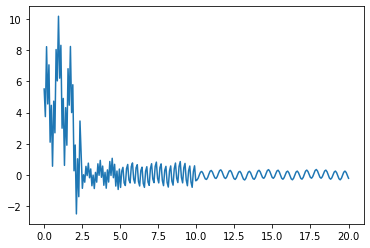

In [53]:
waves = dwt(y, 3)
plt.plot(x, waves)
print(waves[0], waves[128])

1.745596233283166e-14


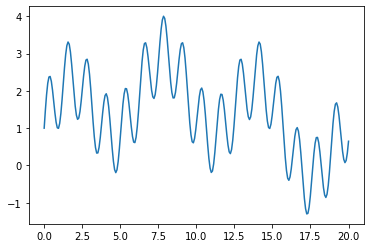

In [56]:
restored = idwt(waves, 3)
plt.plot(x, restored)
print(norm(y - restored, 2))

(880, 587)


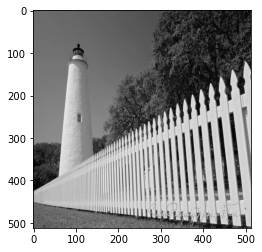

In [52]:
from PIL import Image, ImageOps

img = Image.open("Lighthouse.JPG")
print(img.size)
img = img.resize((512, 512), Image.ANTIALIAS)
img = ImageOps.grayscale(img)
img = np.array(img)
plt.imshow(img, cmap="gray")

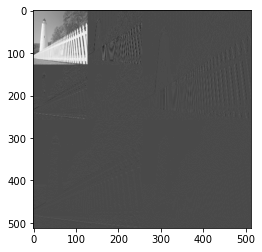

In [84]:
waves = dwt2d(img, 2)
plt.imshow(waves, cmap="gray")

697.304499959839


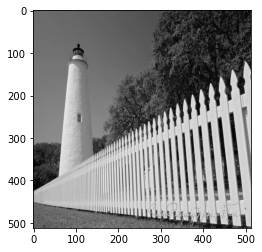

In [85]:
restored = idwt2d(waves, 2)
plt.imshow(restored, cmap="gray")
print(psnr(img, restored))
#print(norm(img - restored, 2))

In [75]:
print(img.dtype)

uint8
